## Basic comparison of Lomb-Scargle in Scipy, AstroML and Gatspy

In [1]:
import numpy as np
from scipy.signal import lombscargle
from astroML.time_series import lomb_scargle
from gatspy.periodic import LombScargle
from numpy.random import rand 
import matplotlib.pyplot as plt

%matplotlib notebook

I generate some artificial data and feed that to all three LS algorithms and see how each one performs.

This data is generated in a way to be easy to tweak and manipulated, if needed. It's a simple sinusoidal with some random noise on top to make it imperfect.

$$ {\rm flux}(t) = {\rm flux}_0 + A \sin(\frac{2 \pi}{P} t+ \phi_0) + {\rm noise} $$

${\rm flux}(t)$: flux at time $t$ 

${\rm flux}_0$: mean flux

$A$: variation amplitude

$P$: variation period

$\phi_0$: initial phase (observation dependent and not playing any major role)

actual period:  4.256


<IPython.core.display.Javascript object>


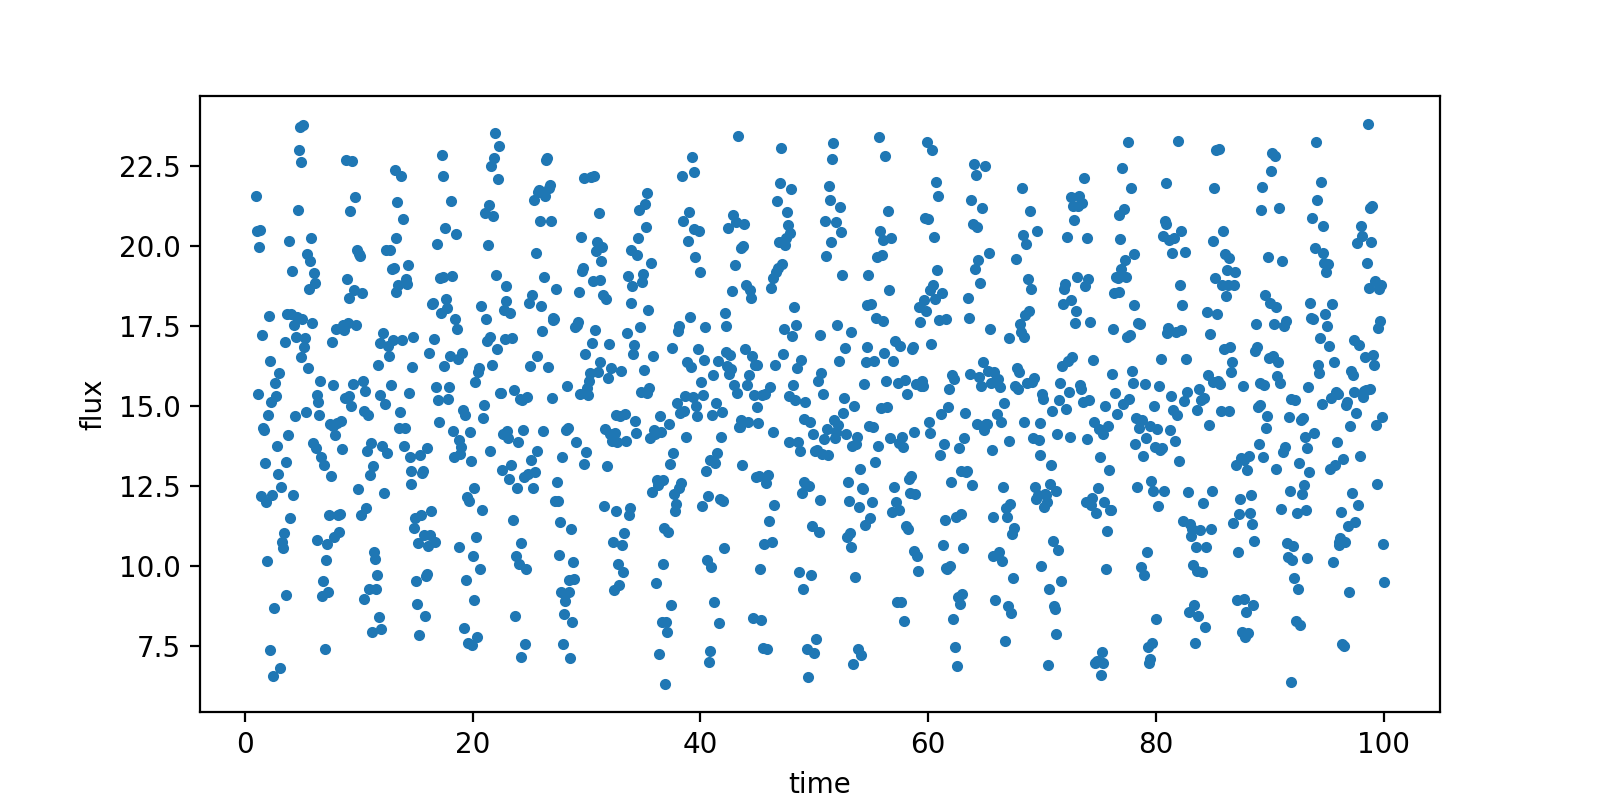

<IPython.core.display.Javascript object>


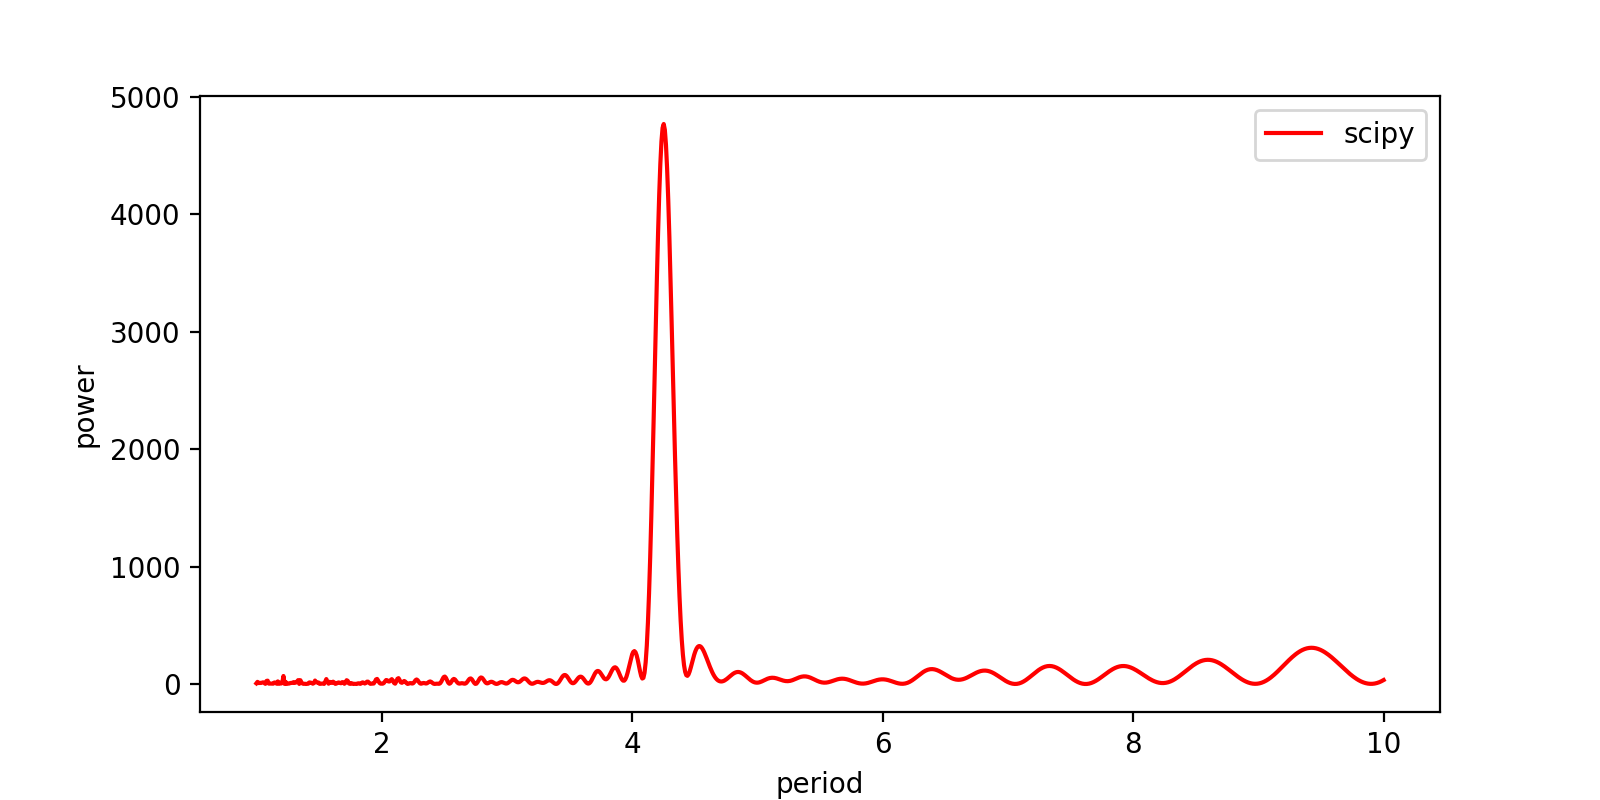

<IPython.core.display.Javascript object>


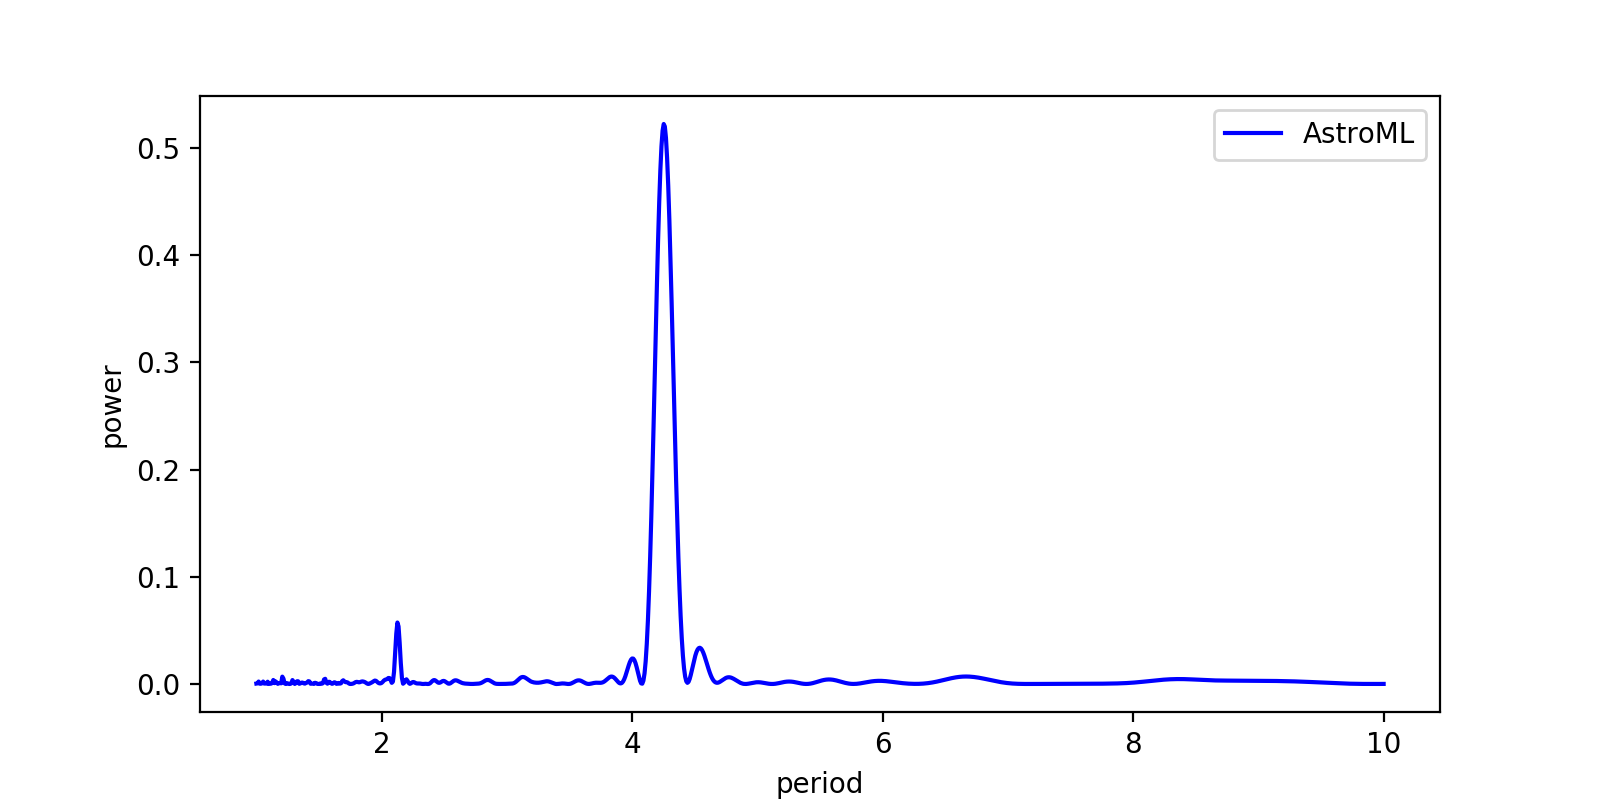

<IPython.core.display.Javascript object>


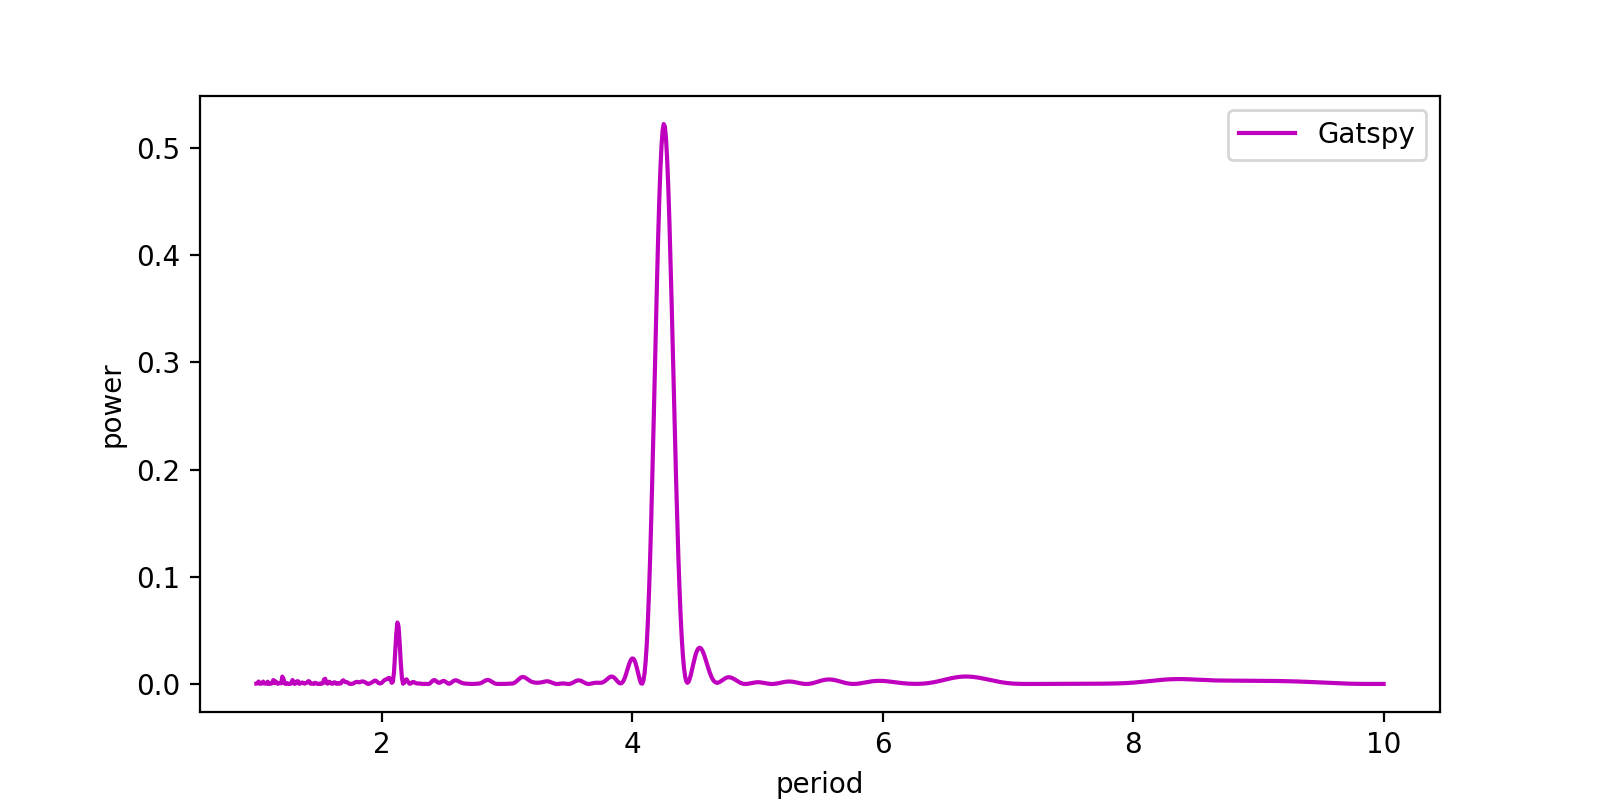

In [2]:
# Feel free to change the following to test various scenarios
actual_period = 4.256
amplitude = 4
phase_0 = 0.2 * np.pi
mean_flux = 10.0
noise_amp = 10

# Generating the data:
time = np.linspace(1,100,1200)
flux = mean_flux + amplitude * np.sin( time * 2 * np.pi / actual_period + phase_0 ) + noise_amp*rand(len(time))

# Generating the sampling periods/frequencies/angular frequencies:
sample_periods = np.linspace(1.0,10.0,1000)
sample_freqs = 1.0 / sample_periods
sample_angfreqs = 2 * np.pi / sample_periods

print 'actual period: ',actual_period

# Plotting the data
plt.figure(figsize=(8,4))
plt.plot(time,flux,'.')
plt.xlabel('time')
plt.ylabel('flux')

# Scipy:
scipy_ls_powers = lombscargle(time,flux,sample_angfreqs)

# AstroML (http://www.astroml.org/)
astroml_ls_powers = lomb_scargle(time, flux, flux*0.1, sample_angfreqs, generalized=True)

# Gatspy (http://www.astroml.org/gatspy/)
gatspy_ls = LombScargle().fit(time, flux, flux*0.1)
gatspy_ls_powers = gatspy_ls.score(sample_periods)

plt.figure(figsize=(8,4))
plt.plot(sample_periods,scipy_ls_powers,'-r', label = 'scipy')
plt.legend()
plt.xlabel('period')
plt.ylabel('power')

plt.figure(figsize=(8,4))
plt.plot(sample_periods,astroml_ls_powers,'-b', label = 'AstroML')
plt.legend()
plt.xlabel('period')
plt.ylabel('power')

plt.figure(figsize=(8,4))
plt.plot(sample_periods,gatspy_ls_powers,'-m', label = 'Gatspy')
plt.legend()
plt.xlabel('period')
plt.ylabel('power')

### Notes:

- All three behave similarly on the fundamental period. However, Scipy seems not to show harmonics of the fundamental (the little peak at $P/2$) which is odd and does a poor job on the higher end of the period sample with all the ups and downs.


- Gatspy and AstroML both need uncertainty values on the data flux values. They treat uncertainties as weights $W=1/\sigma^2$ and so if you do not have estimated uncertainty values for each measurement, you can simply give them uniform uncertainties or estimate based on instrumentalstuff. Here I just assumed 10% uncertainty on every point with "`flux*0.1`"). 


- Both Scipy and AstroML require **angular frequency** samlpes ($2\pi/P$) and not frequency ($1/P$). Gatspy simply requires period sample. 